# How To Avoid Oneself: A Monte-Carlo Study

In [1]:
#importing the libraries and modules we will need, run this first

import numpy as np
from numpy.random import randint
import matplotlib.pyplot as plt
import time
from matplotlib.ticker import PercentFormatter
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## The Drunkard's Walk: A Simple 2D Random Walk 

A **random walk** (or more evocatively, a drunkard's walk) is a common mathematical model and thought experiment that goes as follows: a man walks out of his favourite pub to go home, but with his navigation faculties significantly impaired. At every step he takes, he has a roughly equal probability of walking North, East, South or West. After a long enough time, where are we likely to find him, and what is the path he has followed? It turns out that in $2D$, the probability distribution for the straight line distanced covered by the man can be described by a Gaussian (normal) curve, specifically the Raleigh distribution,
\begin{equation}
    P(r)=\frac{2r}{N}e^{-r^2/N}
\end{equation}    

and the distance ($R$) varies with respect to the number of steps ($N$) as
\begin{equation}
    R^2 \propto N
\end{equation}

While the model seems laughably primitive, it was used by Albert Einstein to explain Brownian motion of a colloidal particle and by Louis Bachelier to model the stock prices of French government bonds around the early 20th century, and still serves as a very good statistical model for diffusion phenomena and for the Black-Scholes formula for options pricing (as two examples). Let us now see what a walk like that would look like by writing a simple program, starting from the origin $(0,0)$ and using a random number generator that churns out an integer from $1$ to $4$ with equal probability, each number corresponding to motion in one of the four directions on a $2D$ plane. [Note: This is far from the most elegant/optimal way to simulate a RW, but it may be the most intuitive/instructive, and that is our goal here.]

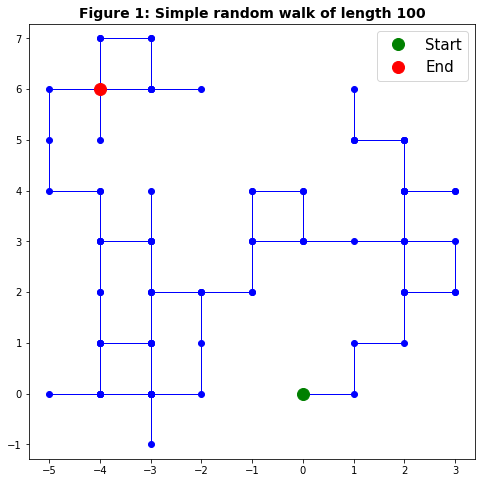

In [2]:
x,y=0,0
h=1
X,Y=[x],[y]
n=100

for i in range(n):
    a=randint(1,5)
    if a==1:
        x+=h
        X.append(x)
        Y.append(y)
    elif a==2:
        x-=h
        X.append(x)
        Y.append(y)
    elif a==3:
        y+=h
        X.append(x)
        Y.append(y)
    elif a==4:
        y-=h
        X.append(x)
        Y.append(y)

plt.figure(figsize = (8, 8))
plt.plot(X, Y, 'bo-', linewidth = 1)
plt.plot(0, 0, 'go', ms = 12, label = 'Start')
plt.plot(X[-1], Y[-1], 'ro', ms = 12, label = 'End')
plt.axis('equal')
plt.legend(fontsize=15)
plt.title('Figure 1: Simple random walk of length ' + str(n), fontsize=14, fontweight='bold')
plt.show()

## You Can Never Go Back: A Non-Reversing Random Walk

Making things a little more complicated for ourselves, let us now try to model a walk where you can move in any direction you want, except for turning around immediately or taking a step backward: this is called a **non-reversing random walk**. This is slightly more complicated, as at every step, the walker must have a memory of his previous location, like the flip-flop element in electronic circuits. This is unlike the simple random walk model, which is what is called a Markov chain process - every step is independent, and has no connection or causal link with the previous process. The non-reversing walk is not a Markov chain process, it has a memory that goes back one iteration. How to model this?

One way is using something called **rejection sampling**. You still go the random walk way, but every time your algorithm generates a movement that is not allowed (i.e. left, when you have just moved right, or up when you have just moved down, etc.), you reject that iteration and run the loop again. In this way, the only movements that show up in your actual working program are the ones that pass this test. However, the problem is attrition: you lose computer power, time and loop iterations doing this, and if you wanted a path of 50 iterations (say), you may not eventually get 50 steps, because of the (illegal!) loops you discarded along the way. Here, we have grouped (up,down) (corresponding to $(1,4)$) and (left,right) (corresponding to $(2,3)$) as complementary moves that are not allowed in successive iterations, as their sums add up to $5$ - whenever this happens, a loop is discarded, and we start again.  

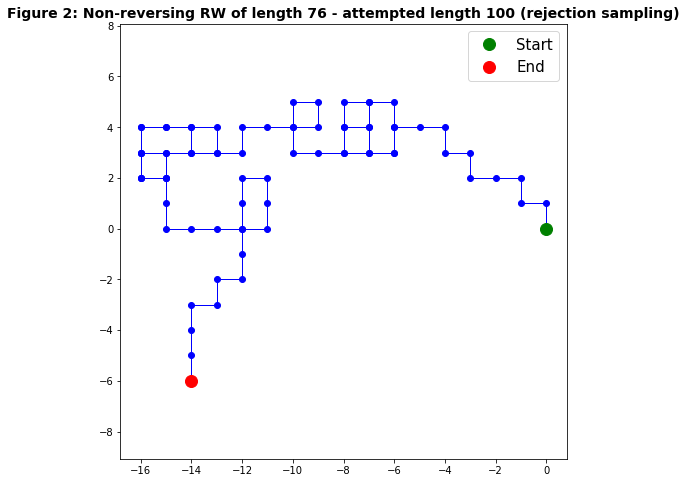

In [3]:
x,y=0,0
h=1
X,Y=[x],[y]
n=100
steps=0
a1=randint(1,5)
for i in range(n):
    a=randint(1,5)
    if a+a1==5: continue
    if a==1:
        x+=h
        X.append(x)
        Y.append(y)
    elif a==4:
        x-=h
        X.append(x)
        Y.append(y)
    elif a==2:
        y+=h
        X.append(x)
        Y.append(y)
    elif a==3:
        y-=h
        X.append(x)
        Y.append(y)
    a1=a
    steps+=1

plt.figure(figsize = (8, 8))
plt.plot(X, Y, 'bo-', linewidth = 1)
plt.plot(0, 0, 'go', ms = 12, label = 'Start')
plt.plot(X[-1], Y[-1], 'ro', ms = 12, label = 'End')
plt.axis('equal')
plt.legend(fontsize=15)
plt.title('Figure 2: Non-reversing RW of length ' + str(steps) + ' - attempted length ' + str(n) + ' (rejection sampling)', fontsize=14, fontweight='bold')
plt.show()

A better (and more efficient) way of simulating a non-reversing walk is by restricting the sample space of feasible movements for our walker in the first place - this incorporates the memory of the previous position in a less attritional way. For our next program, before we generate the random number that tells our walker which way to go, we first cross-reference with our memory variable, which stores the last known position, and restrict the space of possible movements, **BEFORE** using the random number generator. Only then do we generate the next step for our walk. This way, we always end up with the path of the length we want.  

[Note: One thing to note is the qualitative difference between a simple RW and a non-reversing RW - in the first case, there are many open ends, but in a non-reversing walk, it's all closed loops. We should expect this as the only way an open end is generated is if the walker goes forward and then comes back along the same path and then goes elsewhere - this is specifically prohibited for a non-reversing walk. The only way it can get out of a hole is by creating a closed loop.]

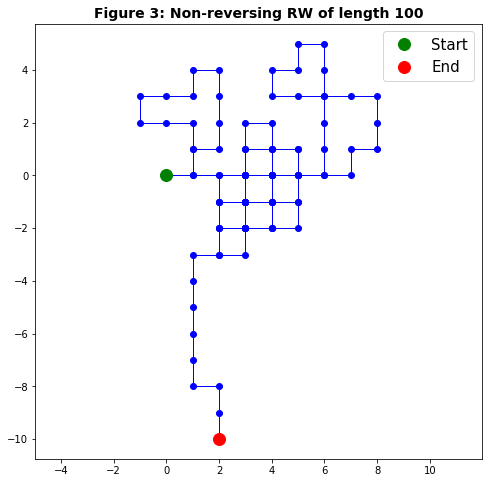

In [4]:
x, y = 0, 0
X, Y = [x], [y]
prevpos = [(0,0)]
steps=0
for i in range(n):
    deltas = [(1,0), (0,1), (-1,0), (0,-1)] #these are the increments
    deltas_feasible = [] #these store the list with all the feasible increments for step i
    for dx, dy in deltas:
        if (X[-1] + dx, Y[-1] + dy) not in prevpos:  
            deltas_feasible.append((dx,dy))
    dx, dy = deltas_feasible[randint(0,len(deltas_feasible))]
    X.append(X[-1] + dx)
    Y.append(Y[-1] + dy)
    prevpos = [(X[-2], Y[-2])]
    steps+=1

plt.figure(figsize = (8, 8))
plt.plot(X, Y, 'bo-', linewidth = 1)
plt.plot(0, 0, 'go', ms = 12, label = 'Start')
plt.plot(X[-1], Y[-1], 'ro', ms = 12, label = 'End')
plt.axis('equal')
plt.legend(fontsize=15)
plt.title('Figure 3: Non-reversing RW of length ' + str(steps), fontsize=14, fontweight='bold')
plt.show()

## Avoiding Oneself: The Rosenbluth Self-Avoiding Walk

We shall now proceed to the meat of our presentation - a **self-avoiding walk**. In simplest terms, it is a random walk that never intersects itself. Our task is the same as that for the famous mobile game *Snake* - the moment the snake bites itself, we are done. [Note: There are more things to be taken into account regarding the ergodicity of our distribution of SAWs and their relative prevalence within that distribution, but we shall come to this later.]

The self-avoiding walk is an extremely good model for **linear long-chain polymers in a good solvent** - technically, we can say that the two problems belong in the same **universality class**, as has been rigorously proved by EW Montroll in 1950 and Mark Fisher in 1974 in a modern renormalization group paradigm. As such, figuring out a way to simulate SAWs effectively can help us understand polymer conformations. Considering polymers lie at the heart of almost all of biology and industrial chemistry, this problem is clearly well-motivated. 

As should be clear here, in this case, our walker needs to remember not just the immediately previous point, but all the points it has visited. A simple algorithm for how to simulate this was given by **Marshall and Arianna Rosenbluth** in 1955, and it goes as follows:

> Set the origin as the starting vertex, and recursively choose the next vertex from the set of nearest neighbors that are not occupied by the walk. If there are no nearest neighbors available, then the walk is rejected and a new walk is initiated at the origin.

This is similar to what we did for non-reversing random walks, but now we need to store all the previous positions in our memory. 

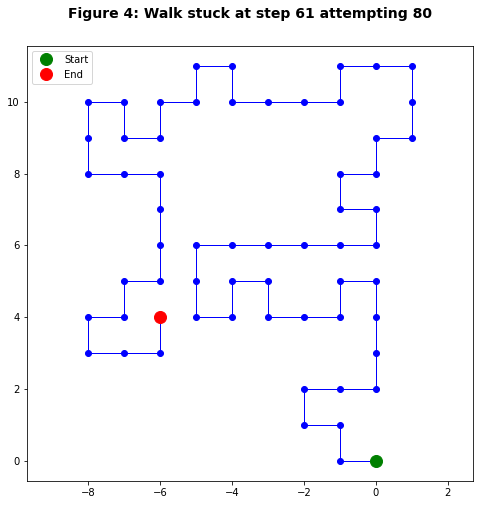

In [5]:
def rosenbluth_saw(n):
    x, y = [0], [0]
    positions = [(0,0)]  #positions is a list that stores all sites visited by the walk
    stuck = 0 #stuck is a Boolean variable that records if we are able to find an SAW of required length, or get stuck
    for i in range(n):
        deltas = [(1,0), (0,1), (-1,0), (0,-1)]
        deltas_feasible = []  #deltas_feasible stores the available directions 
        for dx, dy in deltas:
            if (x[-1] + dx, y[-1] + dy) not in positions:  #checks if direction leads to a site not visited before
                deltas_feasible.append((dx,dy))
        if deltas_feasible:  #checks if there is a direction available
            dx, dy = deltas_feasible[np.random.randint(0,len(deltas_feasible))]  #choose a direction at random among available ones
            positions.append((x[-1] + dx, y[-1] + dy))
            x.append(x[-1] + dx)
            y.append(y[-1] + dy)
        else:  #in that case the walk is stuck
            stuck = 1
            steps = i+1
            break  #terminate the walk prematurely
        steps = n+1
    return x, y, stuck, steps

n=80
x, y, stuck, steps = rosenbluth_saw(n)
plt.figure(figsize = (8, 8))
plt.plot(x, y, 'bo-', linewidth = 1)
plt.plot(0, 0, 'go', ms = 12, label = 'Start')
plt.plot(x[-1], y[-1], 'ro', ms = 12, label = 'End')
plt.axis('equal')
plt.legend()
if stuck:
    plt.title('Figure 4: Walk stuck at step ' + str(steps) + ' attempting ' + str(n), fontsize=14, fontweight='bold', y = 1.05)
else:
    plt.title('Figure 4: SAW of length ' + str(n), fontsize=14, fontweight='bold', y = 1.05)
plt.show()

As we can see, this is not a rock-solid approach - there will be many iterations when we are not able to generate a self-avoiding walk of the required length. This is especially a problem in $2D$ and gets compounded exponentially as we go to longer and longer lengths. In fact, if we had done a simple rejection sampling of SAWs from a distribution of RWs, like we did first for the non-reversing walk, we would find that for $n=20$, only about one in $1200$ would be a self-avoiding walk. For $n=50$, that falls to about one in $24,000,000,00$ (240 million). (Thankfully, we didn't take this approach!) Imagine what would happen if we try and simulate SAWs of lengths $n\approx 3000$, which is the length of a polyethylene chain. But how much better does our Rosenbluth algorithm fare? Let us find out!

In [ ]:
e0=time.time() #this measures when the process for this cell starts
def is_saw(x, y, n):
    return n+1 == len(set(zip(x,y)))  #creating a set removes duplicates, so it suffices to check the size of the set
def rejection_sampling(n, samples):
    accepted = 0
    for i in range(samples):
        x, y, _, _ = rosenbluth_saw(n) #generates a Rosenbluth SAW
        if is_saw(x, y, n): #checks if it is a SAW
            accepted += 1
    return accepted/samples

def plot_acceptance(n, samples):
    acceptance = []
    n_list = [5, 10, 15, 20, 25, 30, 35, 40, 45]
    for i in range(1, n):
        acceptance.append(rejection_sampling(i, samples)*100)
    plt.figure(figsize = (8, 8))
    plt.plot(range(1, n), acceptance, 'o-')
    plt.grid(True)
    ax = plt.axes()
    ax.set_xticks(n_list)
    ax.yaxis.set_major_formatter(PercentFormatter())
    plt.title('Figure 5: Acceptance rate of the rejection sampling method, for Rosenbluth SAWs of different n', 
              fontsize=14, fontweight='bold', y = 1.05)
    plt.show()

plot_acceptance(50,10000)
elapsed_time=time.time()-e0
print("The time taken to generate this plot is", elapsed_time, " seconds.")

As we can see, this graph tells us the Rosenbluth algorithm has pretty good acceptance rates for small $n\approx 20$ - however, the trend of the graph suggests this will fall away as we go up to 100-300, as it is already at $60$ percent for $n=50$. On running this program for $n=150-300$, the times taken were prohibitively long and computing power required was too high for a low-end laptop - so we have kept it to $n=50$ here, which itself took close to 2 minutes. 

However, for small $n$, we see that the algorithm will be able to generate an SAW on the vast majority of its iterations. This is in stark contrast to the same program for simple random walks left to generate SAWs by chance, where we shall see the acceptance rate falls away exponentially even for $n\approx 20$. 

In [ ]:
def simple_RW(n): #generates a random walk by the simple algorithm we used at the beginning
    x, y = [0], [0]
    deltas = [(1,0), (0,1), (-1,0), (0,-1)] #possible directions for the 2D lattice
    for _ in range(n):
        dx, dy = deltas[np.random.randint(0,4)]   #direction chosen at random
        x.append(x[-1] + dx)
        y.append(y[-1] + dy)
    return x, y

def rejection_sampling_simple(n, samples):
    accepted = 0
    for i in range(samples):
        x, y= simple_RW(n) #generates a Rosenbluth SAW
        if is_saw(x, y, n): #checks if it is a SAW
            accepted += 1
    return accepted/samples

def plot_acceptance(n, samples):
    acceptance = []
    for i in range(1, n):
        acceptance.append(rejection_sampling_simple(i, samples)*100)
    plt.figure(figsize = (8, 8))
    plt.plot(range(1, n), acceptance, 'o-')
    plt.grid(True)
    ax = plt.axes()
    ax.set_xticks(list(range(1,n)))
    ax.yaxis.set_major_formatter(PercentFormatter())
    plt.title('Figure 6: Acceptance rate of the rejection sampling method, for simple RWs of different n', 
              fontsize=14, fontweight='bold', y = 1.05)
    plt.show()

plot_acceptance(20,10000)

### A Short Note on Paul Flory, father of polymers

Much of the most influential theoretical work on polymers was done by **Paul Flory**, who used an ingenious combination of dimensional arguments, physical intuition and field theoretic calculations to show that the mean squared end-to-end distance for a polymer (or SAW) varies as
\begin{equation}
    R\propto N^{3/(d+2)},
\end{equation}
where $d$ is the naive dimension (NOT the fractal dimension) of the polymer being studied. In our case $d=2$, so we get the relation, 
\begin{equation}
    R^2\propto N^{3/2}
\end{equation}
As we can see, self-avoiding walks stretch out more than simple random walks (which had a $R^2\propto N$ relation), on average - this is called the excluded volume effect, and we should expect this! After all, simple random walks can twist over and into themselves and curl up much tighter than a self-avoiding walk, which can never intersect itself - in fact, in some polymers, there is a repulsion effect between non-adjacent monomer units, which further contributes to stretching out. Especially in a good solvent, the monomer units prefer to associate with solvent molecules more than other monomer units, which can further facilitate this stretching out.

Flory won a Nobel Prize in 1974 for his work in this field, and his Nobel lecture on **"Spatial Configuration of Macromolecular Chains"** is worth reading for those interested in polymer science. 

## First Among Equals: A Challenge for Computational Estimation

All well and good. But since we seem to have a fairly decent algorithm to generate SAWs, can we now start to computationally estimate global quantities associated with SAWs, and by extension, polymers? Not so fast. In our discussion, we have conveniently assumed that all SAWs are created equal, whereas in reality, they are not! Different SAWs have different probabilities of occurrence, depending on their geometry. Let us see how.

<img src=https://i.imgur.com/p3GqPeL.png width="600">

Consider the two 4-step SAWs shown above. What are their probabilities of occurrence?

For the first one, when it starts, it has four possible directions to move in - so probability for first step=$\frac{1}{4}$. The next step can move in any direction but backward, so probability for second step=$\frac{1}{3}$. Same for third step = $\frac{1}{3}$. But for fourth step, it only has two directions to go in, left or up, without intersections, so probability =$\frac{1}{2}$ - so total probability for this walk is $P_1=\frac{1}{4}\frac{1}{3}\frac{1}{3}\frac{1}{2}$.

For the second one, when it starts, as usual, it has four steps to choose from, so probability of first step=$\frac{1}{4}$. But for all the subsequent steps along the straight line, the walker will always have three options to choose from, i.e. any direction but backward, so probability for 2nd to 4th steps, probability=$\frac{1}{3}$, so total probability $P_2=\frac{1}{4}\frac{1}{3}\frac{1}{3}\frac{1}{3}$. 

As we can see, $P_2>P_1$, in fact the second walk is $1.5$ times as likely to occur if we run a program as the first one. So based on this, we can assign a weight $W_i=1/P_i$ for every SAW, and when we compute any quantity, e.g. $R^2$, we have to make sure to compute a weighted average, or what is called **importance sampling**. 

In the following program, we shall try to simulate $N=1000$ samples for a range of SAW of lengths going from $n=2,20$, compute the mean squared end-to-end distance, and compare the relative error with the standard values found from the literature. 

[Note: We have started $n$ from 2 because you need at least 2 points to have 1 step, i.e. a walk.]

In [ ]:
def saw_weights(n):
    x, y = [0], [0] 
    positions = [(0,0)]
    weights = []
    stuck = 0
    for i in range(n):
        deltas = [(1,0), (0,1), (-1,0), (0,-1)]
        deltas_feasible = []
        for dx, dy in deltas:
            if (x[-1] + dx, y[-1] + dy) not in positions:
                deltas_feasible.append((dx,dy))
        if deltas_feasible:
            weights.append(len(deltas_feasible))  #add inverse probability to weights
            dx, dy = deltas_feasible[randint(0,len(deltas_feasible))]
            positions.append((x[-1] + dx, y[-1] + dy))
            x.append(x[-1] + dx)
            y.append(y[-1] + dy)
        else:
            stuck = 1
            break
    return x, y, stuck, weights

def importance_sampling(n, samples):
    saw = 0
    weight_list = []  #stores weight of each SAW
    norm_list = []  #stores squared end-to-end distance of each SAW
    while saw < samples:  
        x, y, stuck, weights = saw_weights(n)
        weights=np.array(weights)
        if not stuck:
            weight_list.append(np.prod(weights))  #computes final weight of the walk as product of its weights
            norm_list.append(x[-1]**2 + y[-1]**2)  #computes squared end-to-end distance
            saw += 1
    weight_list = np.array(weight_list)
    norm_list = np.array(norm_list)
    estim = np.sum(weight_list * norm_list) / np.sum(weight_list)  #computes estimate (vectorized)
    std = np.sqrt(np.sum( (weight_list / np.sum(weight_list))**2 * (norm_list - estim)**2 )) #computes std (vectorized)
    return (estim, std) 

In [ ]:
e0=time.time()
sq_dis = [2.66667,4.55556,7.04,9.56338,12.5744,15.5562,19.0128,22.4114,26.2425,30.0177,34.187,38.3043,42.7864,
          47.2177,51.9925,56.7164,61.7665,66.7658,72.0765] # hardcoded list of exact mean-squared distances obtained from the literature
sq_dis=np.array(sq_dis)
rsq = []
relative_error= []
for i in range(19):
    estim, _ = importance_sampling(i+2, 1000)
    rsq.append(estim)
    relative_error.append(abs(estim-sq_dis[i])/sq_dis[i]*100)
plt.figure(figsize = (8, 8))
plt.plot(range(2, 21), relative_error, 'o-')
plt.grid(True)
ax = plt.axes()
ax.set_xticks(list(range(2,21)))
ax.yaxis.set_major_formatter(PercentFormatter())
plt.title('Figure 7: Relative errors of the estimate of the squared end-to-end distance, for different n', 
              fontsize=14, fontweight='bold', y = 1.05)
plt.show()
elapsed_time=time.time()-e0
print("The time taken to generated this plot is", elapsed_time, "seconds")

This is not at all what we should expect. For $n>10$, we see a sharp spike in the relative error - it has been suggested in the literature that this kind of instability exists in the Rosenbluth algorithm, and that we may need significantly greater processing power to be able to generate enough samples for this to be a useful computational estimate. For $n=10$, there are about the order of $10^7$ unique walks - for $n=11$, this jumps up to $10^8$, and maybe $N=10^3$ may no longer be good enough to get an accurate idea of estimates over the whole sample space. However, at least we see that upto $n=10$, this gives us good correlation with the expected mean squared end-to-end distances. 

To end this exploration, we end with two plots, one for the walks we generated from $n=(2,10)$ and one for the curve $R=N^{3/2}$.

In [ ]:
x=np.linspace(2,9,num=8)
plt.plot(x, rsq[1:9])
plt.plot(x, x**1.5)
plt.legend(["Computed Estimate of R^2", "R^2=N^(3/2)"])

In [ ]:
# Animation

%matplotlib notebook
import celluloid
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import numpy as np
import numba
from numba import jit, njit
from celluloid import Camera
import ffmpeg
from numpy.random import randint, random, choice
from IPython.display import HTML
from matplotlib.colors import LogNorm
from matplotlib import cm

np.random.seed(0)
n=100
fig=plt.figure(figsize=(8, 8))
camera = Camera(fig)

x, y = [0], [0]
positions = [(0,0)]  #positions is a list that stores all sites visited by the walk
for i in range(n):
    deltas = [(1,0), (0,1), (-1,0), (0,-1)]
    deltas_feasible = []  #deltas_feasible stores the available directions 
    for dx, dy in deltas:
        if (x[-1] + dx, y[-1] + dy) not in positions:  #checks if direction leads to a site not visited before
            deltas_feasible.append((dx,dy))
    if deltas_feasible:  #checks if there is a direction available
        dx, dy = deltas_feasible[randint(0,len(deltas_feasible))]  #choose a direction at random among available ones
        positions.append((x[-1] + dx, y[-1] + dy))
        x.append(x[-1] + dx)
        y.append(y[-1] + dy)
    else:  #in that case the walk is stuck
        break  #terminate the walk prematurely
    plt.plot(x, y, 'bo-', linewidth = 1)
    plt.plot(0, 0, 'go', ms = 12)
    plt.plot(x[-1], y[-1], 'ro', ms = 12)
    plt.xlim(min(x)-1, max(x)+1)
    plt.ylim(min(y)-1, max(y)+1)
    plt.axis('equal')
    camera.snap()

animation = camera.animate()
animation.save('SAW_anim.mp4')
HTML(animation.to_html5_video())